# Predicción de Alumnos titulados de educación superior en Chile en el año 2023 mediante técnicas de Machine Learning



Integrantes: Raúl Urzúa, Adán Marchena

Institución: Universidad de Las Américas

Programa: Magíster en Data Science

## 1. Introducción

La educación superior cumple un rol fundamental en el desarrollo social y económico de un país, siendo la formación de capital humano uno de los principales mecanismos para mejorar la productividad y reducir brechas de desigualdad. En Chile, el sistema de educación superior se caracteriza por una estructura diversa, compuesta por universidades, institutos profesionales y centros de formación técnica, cada uno con enfoques formativos y perfiles de egreso diferenciados.

El análisis de los titulados de educación superior permite comprender patrones asociados a la duración de los estudios, características demográficas de los estudiantes y diferencias entre áreas del conocimiento y tipos de instituciones. En este contexto, el uso de técnicas de Machine Learning ofrece herramientas adecuadas para identificar relaciones complejas entre variables y realizar predicciones a partir de datos históricos.

## 2. Objetivo General

El objetivo de este trabajo es evaluar la capacidad de distintos modelos de aprendizaje supervisado para predecir la probabilidad de titulacion en 10 semestres, utilizando información académica y demográfica proveniente de datos abiertos correspondiente al año 2023. Adicionalmente, se comparará el desempeño de modelos lineales, basados en árboles y métodos de ensamble, empleando métricas estándar de evaluación y validación cruzada.

Este estudio busca aportar evidencia empírica sobre la utilidad de los enfoques de Machine Learning en el análisis de datos educacionales, así como entregar una comparación metodológica que permita evaluar las fortalezas y limitaciones de distintos algoritmos aplicados a un problema de clasificación multiclase.

## 3. Objetivo Especifico

- Conocer el perfil de los estudiantes que se titulan y de los que no se titulan.
- Reducir la cantidad de estudiante que no se titulan.
- Mejorar los planes de estudio y ayudantía.
- Disminución del costo.
- Mejoramiento de la eficiencia.
- Mejora de recursos.

## 4. Fuente de datos

Los datos utilizados en este estudio provienen de registros oficiales de titulados de educación superior en Chile, correspondiente al año 2023. Estos conjuntos de datos incluyen información demográfica de los estudiantes, características académicas de las carreras cursadas y antecedentes de las instituciones de egreso. Los datos fueron integrados en una única base, permitiendo un análisis conjunto y comparativo a lo largo del período estudiado.

In [4]:
# Librerías

import numpy as np
import pandas as pd

# StratifiedKFold comparar modelos
# GridSearchCVseleccionar hiperparámetros
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import joblib






In [5]:
# Crear un DataFrame
df = pd.read_csv("titulados2023.csv", sep=',')

In [6]:
df.head(5)

,anyo_matricula,mrun,gen_alu,fec_nac_alu,rango_edad_matricula,anio_ing_carr_ori,sem_ing_carr_ori,anio_ing_carr_act,sem_ing_carr_act,tipo_inst_1,...,requisito_ingreso,dur_total_carr,valor_matricula,valor_arancel,titulado,agno,rbd,cod_depe,cod_depe2,prom_notas_alu
0,2019,2069.0,1,200012,15 a 19 años,2019,1,2019,1,Universidades,...,Educación Media,10,165000,3570000,False,2018.0,7236.0,2,1,"6,2"
1,2019,2908.0,2,200005,15 a 19 años,2019,1,2019,1,Universidades,...,Educación Media,10,296400,2964000,False,2018.0,31388.0,3,2,"4,7"
2,2019,3504.0,2,200002,15 a 19 años,2019,1,2019,1,Universidades,...,Educación Media,10,175000,4385800,True,2017.0,17850.0,3,2,"6,5"
3,2019,4060.0,2,200007,15 a 19 años,2019,1,2019,1,Universidades,...,Educación Media,10,120000,2848200,True,2018.0,366.0,4,3,"5,5"
4,2019,4541.0,2,200007,15 a 19 años,2019,1,2019,1,Universidades,...,Educación Media,10,139200,4111800,False,2018.0,8927.0,1,1,"6,5"


In [7]:
# Cantidad de filas
df.shape

(65217, 30)

In [8]:
df.columns

Index(['anyo_matricula', 'mrun', 'gen_alu', 'fec_nac_alu',
       'rango_edad_matricula', 'anio_ing_carr_ori', 'sem_ing_carr_ori',
       'anio_ing_carr_act', 'sem_ing_carr_act', 'tipo_inst_1', 'tipo_inst_2',
       'tipo_inst_3', 'cod_inst', 'nomb_carrera', 'modalidad', 'jornada',
       'tipo_plan_carr', 'region_sede', 'provincia_sede', 'comuna_sede',
       'requisito_ingreso', 'dur_total_carr', 'valor_matricula',
       'valor_arancel', 'titulado', 'agno', 'rbd', 'cod_depe', 'cod_depe2',
       'prom_notas_alu'],
      dtype='object')

In [9]:
df.describe()

,anyo_matricula,mrun,gen_alu,fec_nac_alu,anio_ing_carr_ori,sem_ing_carr_ori,anio_ing_carr_act,sem_ing_carr_act,cod_inst,dur_total_carr,valor_matricula,valor_arancel,agno,rbd,cod_depe,cod_depe2
count,65217.0,6.521700e+04,65217.000000,65217.000000,65217.000000,65217.0,65217.0,65217.000000,65217.000000,65217.0,65217.000000,6.521700e+04,65217.000000,65217.000000,65217.000000,65217.000000
mean,2019.0,1.252665e+07,1.608967,199974.111919,2018.958354,1.0,2019.0,1.000015,67.430869,10.0,216769.304399,3.724802e+06,2017.505344,12122.491559,3.018676,2.098149
std,0.0,7.224469e+06,0.487985,124.877410,0.242177,0.0,0.0,0.003916,107.202416,0.0,124542.702595,9.288630e+05,0.657653,9075.925433,1.024040,0.894958
min,2019.0,2.069000e+03,1.000000,196102.000000,2016.000000,1.0,2019.0,1.000000,1.000000,10.0,75000.000000,1.130000e+06,2016.000000,1.000000,1.000000,1.000000
25%,2019.0,6.325278e+06,1.000000,199909.000000,2019.000000,1.0,2019.0,1.000000,20.000000,10.0,139200.000000,3.007000e+06,2017.000000,4829.000000,3.000000,2.000000
50%,2019.0,1.248450e+07,2.000000,200005.000000,2019.000000,1.0,2019.0,1.000000,70.000000,10.0,165000.000000,3.588000e+06,2018.000000,9411.000000,3.000000,2.000000
75%,2019.0,1.878093e+07,2.000000,200011.000000,2019.000000,1.0,2019.0,1.000000,85.000000,10.0,250000.000000,4.364400e+06,2018.000000,17843.000000,3.000000,2.000000
max,2019.0,2.576477e+07,2.000000,200207.000000,2019.000000,1.0,2019.0,2.000000,896.000000,10.0,633676.000000,6.584720e+06,2018.000000,40457.000000,6.000000,5.000000


## 5. Descripcion del Dataset

El dataset titulados2023 contiene información individual de estudiantes matriculados en universidades
chilenas que ingresaron el año 2019 a programas de pregrado con una duración teórica total de 10
semestres y que iniciaron en el primer semestre. A cada registro se le vincula el antecedente de si la
persona obtuvo o no el título al año 2023, así como información académica proveniente de la enseñanza
media. A continuación, se muestran las variables presentes en el dataset:</br>
- **anyo_matricula:** Año académico del proceso de matrícula (ej., 2019).
- **mrun:** Identificador único del estudiante en bases de educación superior.
- **gen_alu:** Género del estudiante: 1 = Hombre, 2 = Mujer.
- **fec_nac_alu:** Fecha de nacimiento (AAAAMM o AAAAMMDD seg ́un fuente).
- **rango_edad_matricula:** Rango de edad al momento de la matrícula (ej., “20–24 a ̃nos”, “25–29
años”).
- **anio_ing_carr_ori:** Año de ingreso a la carrera de origen.
- **sem_ing_carr_ori:** Semestre de ingreso a la carrera de origen (1 = Primer semestre, 2 = Segundo
semestre).
- **anio_ing_carr_act:** Año de ingreso a la carrera actual (post convalidación o cambio).
- **seming_carr_act:** Semestre de ingreso a la carrera actual (1°, 2°).
- **tipo_inst_1:** Tipo institucional, “Centro de Formación Técnica”, “Instituto Profesional” o “Universidad”.
- **tipo_inst_2:** Detalle institucional, CFT, IP, “Universidad CRUCH” o “Universidad Privada”.
- **tip_inst_3:** Detalle ampliado, CFT, IP, “Universidad Estatal CRUCH”, “Universidad Privada” o
“Universidad Privada CRUCH”.
- **cod_inst:** Código de la institución de educación superior.
- **nomb_carrera:** Nombre de la carrera o programa.
- **modalidad:** Modalidad de impartición, “PRESENCIAL”, “SEMIPRESENCIAL” o “NO PRESENCIAL”.
- **jornada:** Jornada de la carrera, “DIURNO”, “VESPERTINO”, “SEMIPRESENCIAL”, “A DISTANCIA”
u “OTRO”.
- **tip_plan_carr:** Tipo de plan, “PLAN REGULAR”, “PLAN ESPECIAL” o “PLAN REGULAR
DE CONTINUIDAD”.
- **region_sede:** Región de la sede donde se imparte la carrera.
- **provincia_sede:** Provincia de la sede.

## 6. Definición de la variable objetivo: Titulado

La variable objetivo de este estudio corresponde a la condición de titulado en 10 semestres de la carrera, definida como una variable binaria que indica si el alumno esta titulado o no.

- 53163 estudiantes no se titularon.
- 12054 estudiantes se titularon.

Es indica que el 81.51% de los estudiantes no se titularon en los 10 semestres.

## 7. EDA

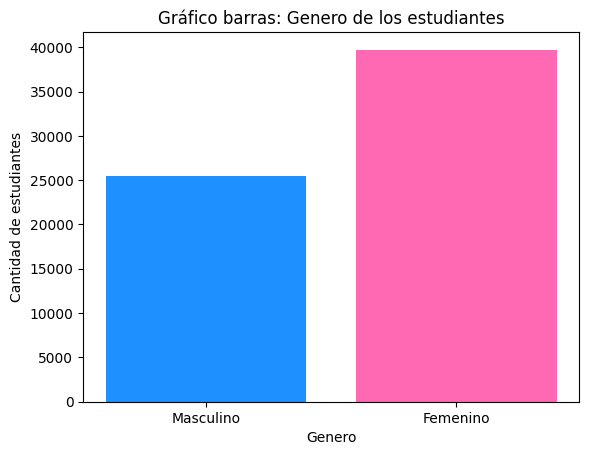

In [10]:
# Grafico barras genero del alumno
genero = ["Masculino","Femenino"]
count = [
    df['gen_alu'].value_counts()[1],
    df['gen_alu'].value_counts()[2]
    ]
colores = ["#1E90FF", "#FF69B4"] # celeste y rosado
plt.bar(genero, count, color = colores)
plt.title('Gráfico barras: Genero de los estudiantes')
plt.xlabel('Genero')
plt.ylabel('Cantidad de estudiantes')
plt.show()

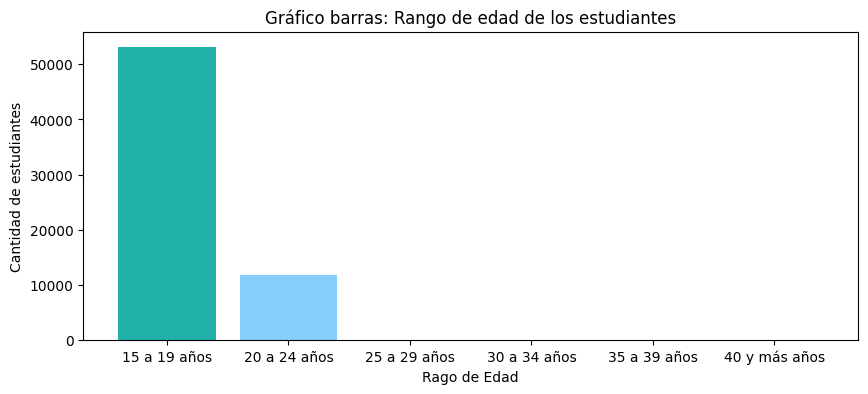

In [11]:
# Gráfico barras Rango Edad Matrícula
rango = ["15 a 19 años","20 a 24 años", "25 a 29 años", "30 a 34 años", "35 a 39 años", "40 y más años"]
count = [
    df['rango_edad_matricula'].value_counts()["15 a 19 años"],
    df['rango_edad_matricula'].value_counts()["20 a 24 años"],
    df['rango_edad_matricula'].value_counts()["25 a 29 años"],
    df['rango_edad_matricula'].value_counts()["30 a 34 años"],
    df['rango_edad_matricula'].value_counts()["35 a 39 años"],
    df['rango_edad_matricula'].value_counts()["40 y más años"]
    ]
colores = ["#20B2AA", "#87CEFA", "#FFA07A", "#9370DB", "#FF4500", "#CD853F"] # verde, celeste, naranja, morado, rojo, cafe
plt.figure(figsize=(10, 4))  # ancho, alto en pulgadas
plt.bar(rango, count, color = colores )
plt.title('Gráfico barras: Rango de edad de los estudiantes')
plt.xlabel('Rago de Edad')
plt.ylabel('Cantidad de estudiantes')
plt.show()

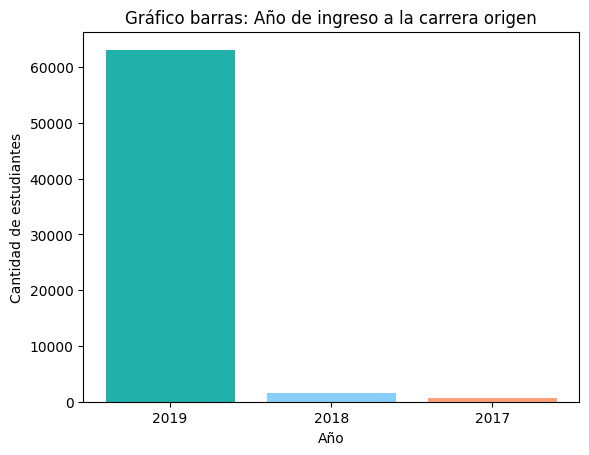

In [12]:
# Grafico Barras Año de ingreso a la carrera actual
anyo = ["2019", "2018", "2017"]
count = [
    df['anio_ing_carr_ori'].value_counts()[2019],
    df['anio_ing_carr_ori'].value_counts()[2018],
    df['anio_ing_carr_ori'].value_counts()[2017]
    ]
colores = ["#20B2AA", "#87CEFA", "#FFA07A"] # verde, celeste, naranja
plt.bar(anyo, count, color = colores)
plt.title('Gráfico barras: Año de ingreso a la carrera origen')
plt.xlabel('Año')
plt.ylabel('Cantidad de estudiantes')
plt.show()

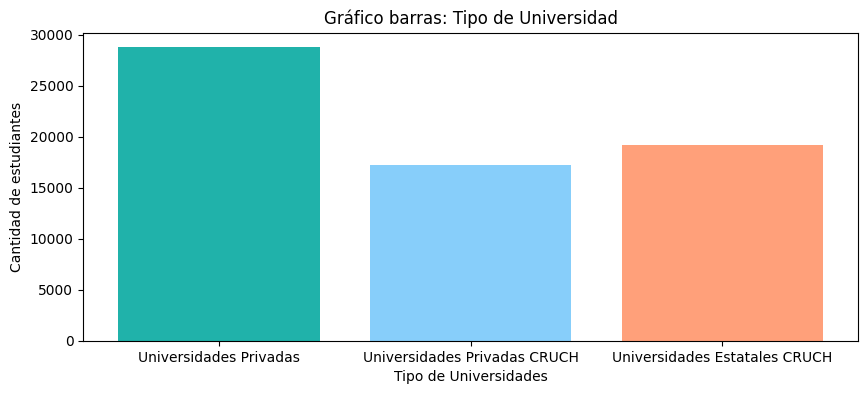

In [13]:
# Grafico barra tipo intitucional
Universidad = ["Universidades Privadas", "Universidades Privadas CRUCH", "Universidades Estatales CRUCH"]
count = [
    df['tipo_inst_3'].value_counts()["Universidades Privadas"],
    df['tipo_inst_3'].value_counts()["Universidades Privadas CRUCH"],
    df['tipo_inst_3'].value_counts()["Universidades Estatales CRUCH"]
    ]
colores = ["#20B2AA", "#87CEFA", "#FFA07A"] # verde, celeste, naranja
plt.figure(figsize=(10, 4))  # ancho, alto en pulgadas
plt.bar(Universidad, count, color = colores)
plt.title('Gráfico barras: Tipo de Universidad')
plt.xlabel('Tipo de Universidades')
plt.ylabel('Cantidad de estudiantes')
plt.show()

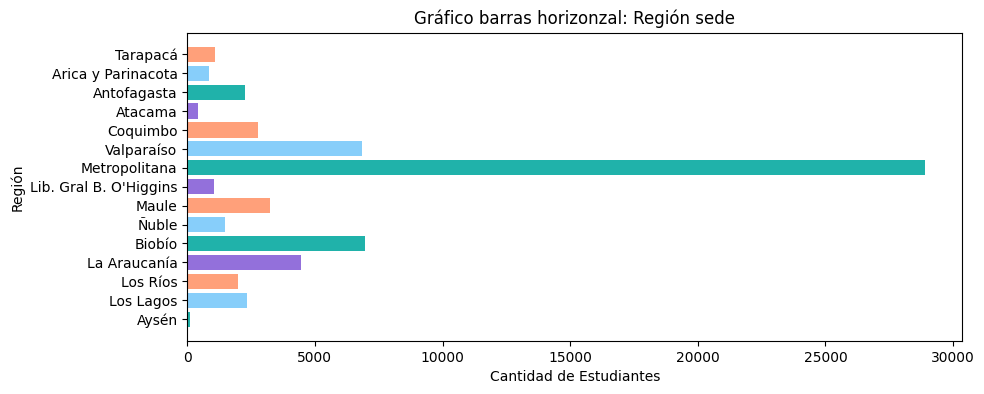

In [14]:
# Gráfico barra region sede
Region = [
    "Aysén",
    "Los Lagos",
    "Los Ríos",
    "La Araucanía",
    "Biobío",
    "Ñuble",
    "Maule",
    "Lib. Gral B. O'Higgins",
    "Metropolitana",
    "Valparaíso",
    "Coquimbo",
    "Atacama",
    "Antofagasta",
    "Arica y Parinacota",
    "Tarapacá"
    ]
count = [
    df['region_sede'].value_counts()["Aysén"],
    df['region_sede'].value_counts()["Los Lagos"],
    df['region_sede'].value_counts()["Los Ríos"],
    df['region_sede'].value_counts()["La Araucanía"],
    df['region_sede'].value_counts()["Biobío"],
    df['region_sede'].value_counts()["Ñuble"],
    df['region_sede'].value_counts()["Maule"],
    df['region_sede'].value_counts()["Lib. Gral B. O'Higgins"],
    df['region_sede'].value_counts()["Metropolitana"],
    df['region_sede'].value_counts()["Valparaíso"],
    df['region_sede'].value_counts()["Coquimbo"],
    df['region_sede'].value_counts()["Atacama"],
    df['region_sede'].value_counts()["Antofagasta"],
    df['region_sede'].value_counts()["Arica y Parinacota"],
    df['region_sede'].value_counts()["Tarapacá"]
    ]
colores = ["#20B2AA", "#87CEFA", "#FFA07A", "#9370DB"] # verde, celeste, naranja, morado
plt.figure(figsize=(10, 4))  # ancho, alto en pulgadas
plt.barh(Region, count, color = colores)
plt.title('Gráfico barras horizonzal: Región sede')
plt.xlabel('Cantidad de Estudiantes')
plt.ylabel('Región')
plt.show()

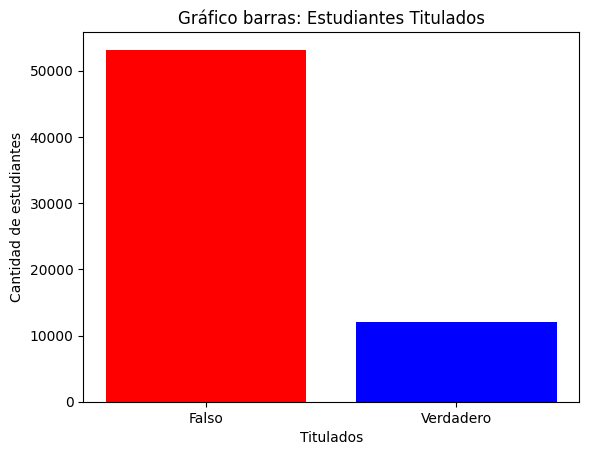

53163 No Titulados
12054 Titulados


In [15]:
# Grafico barras genero del alumno
titulado = ["Falso", "Verdadero"]
count = [
    df['titulado'].value_counts()[False],
    df['titulado'].value_counts()[True]
    ]
colores = ["#FF0000", "#0000FF"]
plt.bar(titulado, count, color = colores)
plt.title('Gráfico barras: Estudiantes Titulados')
plt.xlabel('Titulados')
plt.ylabel('Cantidad de estudiantes')
plt.show()
print(df['titulado'].value_counts()[False], "No Titulados")
print(df['titulado'].value_counts()[True], "Titulados")

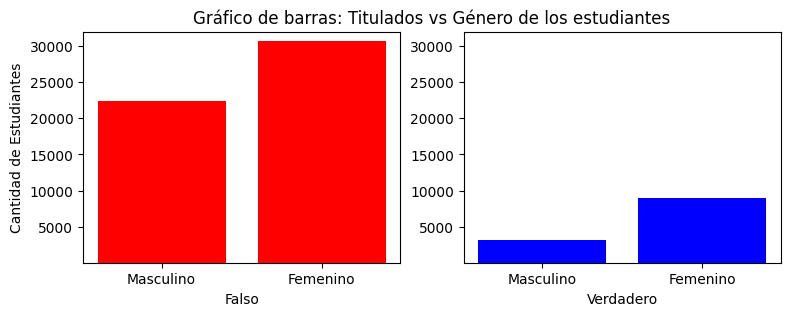

In [16]:
# Gráfico de barras: Titulados vs Género de los estudiantes
genero = ["Masculino","Femenino"]

Variable_titulado = df['titulado']
Genero_alumno = df['gen_alu']
Genero_alumno_verdadero = []
Genero_alumno_falso = []

for i in range(len(Variable_titulado)):
  if Variable_titulado[i] == True:
    Genero_alumno_verdadero.append(Genero_alumno[i])
  if Variable_titulado[i] == False:
    Genero_alumno_falso.append(Genero_alumno[i])

cantidad_hombres_verdadero = 0
cantidad_mujeres_verdadero = 0
for i in range(len(Genero_alumno_verdadero)):
  if Genero_alumno_verdadero[i] == 1:
    cantidad_hombres_verdadero += 1
  if Genero_alumno_verdadero[i] == 2:
    cantidad_mujeres_verdadero += 1

count_genero_verdadero = [cantidad_hombres_verdadero, cantidad_mujeres_verdadero ]

cantidad_hombres_falso = 0
cantidad_mujeres_falso = 0
for i in range(len(Genero_alumno_falso)):
  if Genero_alumno_falso[i] == 1:
    cantidad_hombres_falso += 1
  if Genero_alumno_falso[i] == 2:
    cantidad_mujeres_falso += 1

count_genero_falso = [cantidad_hombres_falso, cantidad_mujeres_falso ]

plt.figure(figsize=(9, 3))
plt.title("Gráfico de barras: Titulados vs Género de los estudiantes")
plt.axis('off')

plt.subplot(1, 2, 1)
plt.bar(genero, count_genero_falso, color='red', label='Falso')
plt.ylabel("Cantidad de Estudiantes")
plt.ylim(1, 32000)
plt.xlabel("Falso")

plt.subplot(1, 2, 2)
plt.bar(genero, count_genero_verdadero, color='blue', label='Verdadero')
plt.ylim(1, 32000)
plt.xlabel("Verdadero")

plt.show()


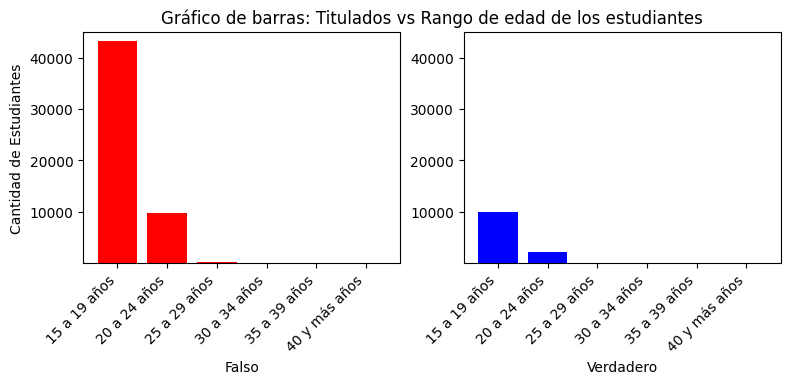

In [17]:
# Gráfico de barras: Titulados vs Rango de edad de los estudiantes
rango = ["15 a 19 años","20 a 24 años", "25 a 29 años", "30 a 34 años", "35 a 39 años", "40 y más años"]

Variable_titulado = df['titulado']
Rango_edad = df['rango_edad_matricula']
Rango_edad_verdadero = []
Rango_edad_falso = []

for i in range(len(Variable_titulado)):
  if Variable_titulado[i] == True:
    Rango_edad_verdadero.append(Rango_edad[i])
  if Variable_titulado[i] == False:
    Rango_edad_falso.append(Rango_edad[i])

cantidad_verdadero_rango1 = 0
cantidad_verdadero_rango2 = 0
cantidad_verdadero_rango3 = 0
cantidad_verdadero_rango4 = 0
cantidad_verdadero_rango5 = 0
cantidad_verdadero_rango6 = 0
for i in range(len(Rango_edad_verdadero)):
  if Rango_edad_verdadero[i] == "15 a 19 años":
    cantidad_verdadero_rango1 += 1
  if Rango_edad_verdadero[i] == "20 a 24 años":
    cantidad_verdadero_rango2 += 1
  if Rango_edad_verdadero[i] == "25 a 29 años":
    cantidad_verdadero_rango3 += 1
  if Rango_edad_verdadero[i] == "30 a 34 años":
    cantidad_verdadero_rango4 += 1
  if Rango_edad_verdadero[i] == "35 a 39 años":
    cantidad_verdadero_rango5 += 1
  if Rango_edad_verdadero[i] == "40 y más años":
    cantidad_verdadero_rango6 += 1

count_rango_verdadero = [
    cantidad_verdadero_rango1,
    cantidad_verdadero_rango2,
    cantidad_verdadero_rango3,
    cantidad_verdadero_rango4,
    cantidad_verdadero_rango5,
    cantidad_verdadero_rango6
    ]

cantidad_falso_rango1 = 0
cantidad_falso_rango2 = 0
cantidad_falso_rango3 = 0
cantidad_falso_rango4 = 0
cantidad_falso_rango5 = 0
cantidad_falso_rango6 = 0
for i in range(len(Rango_edad_falso)):
  if Rango_edad_falso[i] == "15 a 19 años":
    cantidad_falso_rango1 += 1
  if Rango_edad_falso[i] == "20 a 24 años":
    cantidad_falso_rango2 += 1
  if Rango_edad_falso[i] == "25 a 29 años":
    cantidad_falso_rango3 += 1
  if Rango_edad_falso[i] == "30 a 34 años":
    cantidad_falso_rango4 += 1
  if Rango_edad_falso[i] == "35 a 39 años":
    cantidad_falso_rango5 += 1
  if Rango_edad_falso[i] == "40 y más años":
    cantidad_falso_rango6 += 1

count_rango_falso = [
    cantidad_falso_rango1,
    cantidad_falso_rango2,
    cantidad_falso_rango3,
    cantidad_falso_rango4,
    cantidad_falso_rango5,
    cantidad_falso_rango6
    ]

plt.figure(figsize=(9, 3))
plt.title("Gráfico de barras: Titulados vs Rango de edad de los estudiantes")
plt.axis('off')

plt.subplot(1, 2, 1)
plt.bar(rango, count_rango_falso, color='red', label='Falso')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Cantidad de Estudiantes")
plt.ylim(1, 45000)
plt.xlabel("Falso")

plt.subplot(1, 2, 2)
plt.bar(rango, count_rango_verdadero, color='blue', label='Verdadero')
plt.xticks(rotation=45, ha='right')
plt.ylim(1, 45000)
plt.xlabel("Verdadero")

plt.show()

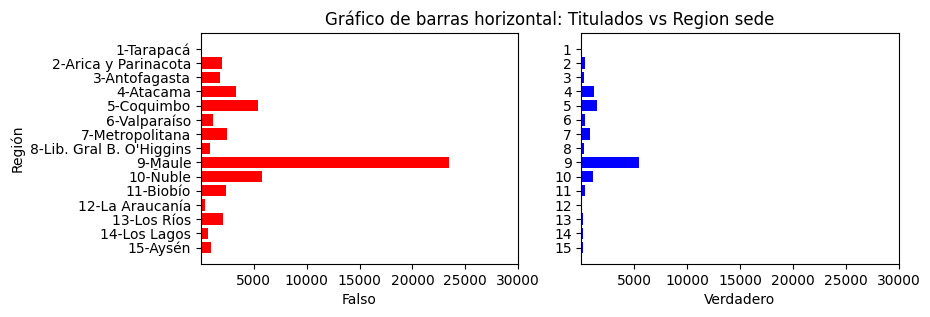

In [18]:
# Gráfico barra region sede
Region = [
    "15-Aysén",
    "14-Los Lagos",
    "13-Los Ríos",
    "12-La Araucanía",
    "11-Biobío",
    "10-Ñuble",
    "9-Maule",
    "8-Lib. Gral B. O'Higgins",
    "7-Metropolitana",
    "6-Valparaíso",
    "5-Coquimbo",
    "4-Atacama",
    "3-Antofagasta",
    "2-Arica y Parinacota",
    "1-Tarapacá"
    ]
Region2 =["15", "14", "13", "12", "11", "10", "9", "8", "7", "6", "5", "4", "3", "2", "1"]

Variable_titulado = df['titulado']
Variable_region = df['region_sede']
Region_verdadero = []
Region_edad_falso = []

for i in range(len(Variable_titulado)):
  if Variable_titulado[i] == True:
    Region_verdadero.append(Variable_region[i])
  if Variable_titulado[i] == False:
    Region_edad_falso.append(Variable_region[i])

cantidad_verdadero_region1 = 0
cantidad_verdadero_region2 = 0
cantidad_verdadero_region3 = 0
cantidad_verdadero_region4 = 0
cantidad_verdadero_region5 = 0
cantidad_verdadero_region6 = 0
cantidad_verdadero_region7 = 0
cantidad_verdadero_region8 = 0
cantidad_verdadero_region9 = 0
cantidad_verdadero_region10 = 0
cantidad_verdadero_region11 = 0
cantidad_verdadero_region12 = 0
cantidad_verdadero_region13 = 0
cantidad_verdadero_region14 = 0
cantidad_verdadero_region15 = 0
for i in range(len(Region_verdadero)):

  if Region_verdadero[i] == "Aysén":
    cantidad_verdadero_region15 += 1
  if Region_verdadero[i] == "Los Lagos":
    cantidad_verdadero_region14 += 1
  if Region_verdadero[i] == "Los Ríos":
    cantidad_verdadero_region13 += 1
  if Region_verdadero[i] == "La Araucanía":
    cantidad_verdadero_region12 += 1
  if Region_verdadero[i] == "Biobío":
    cantidad_verdadero_region11 += 1
  if Region_verdadero[i] == "Ñuble":
    cantidad_verdadero_region10 += 1
  if Region_verdadero[i] == "Maule":
    cantidad_verdadero_region9 += 1
  if Region_verdadero[i] == "Lib. Gral B. O'Higgins":
    cantidad_verdadero_region8 += 1
  if Region_verdadero[i] == "Metropolitana":
    cantidad_verdadero_region7 += 1
  if Region_verdadero[i] == "Valparaíso":
    cantidad_verdadero_region6 += 1
  if Region_verdadero[i] == "Coquimbo":
    cantidad_verdadero_region5 += 1
  if Region_verdadero[i] == "Atacama":
    cantidad_verdadero_region4 += 1
  if Region_verdadero[i] == "Antofagasta":
    cantidad_verdadero_region3 += 1
  if Region_verdadero[i] == "Arica y Parinacota":
    cantidad_verdadero_region2 += 1
  if Region_verdadero[i] == "Tarapacá":
    cantidad_verdadero_region1 += 1


count_region_verdadero = [
    cantidad_verdadero_region1,
    cantidad_verdadero_region2,
    cantidad_verdadero_region3,
    cantidad_verdadero_region4,
    cantidad_verdadero_region5,
    cantidad_verdadero_region6,
    cantidad_verdadero_region7,
    cantidad_verdadero_region8,
    cantidad_verdadero_region9,
    cantidad_verdadero_region10,
    cantidad_verdadero_region11,
    cantidad_verdadero_region12,
    cantidad_verdadero_region13,
    cantidad_verdadero_region14,
    cantidad_verdadero_region15
    ]

cantidad_falso_region1 = 0
cantidad_falso_region2 = 0
cantidad_falso_region3 = 0
cantidad_falso_region4 = 0
cantidad_falso_region5 = 0
cantidad_falso_region6 = 0
cantidad_falso_region7 = 0
cantidad_falso_region8 = 0
cantidad_falso_region9 = 0
cantidad_falso_region10 = 0
cantidad_falso_region11 = 0
cantidad_falso_region12 = 0
cantidad_falso_region13 = 0
cantidad_falso_region14 = 0
cantidad_falso_region15 = 0
for i in range(len(Region_edad_falso)):

  if Region_edad_falso[i] == "Aysén":
    cantidad_falso_region15 += 1
  if Region_edad_falso[i] == "Los Lagos":
    cantidad_falso_region14 += 1
  if Region_edad_falso[i] == "Los Ríos":
    cantidad_falso_region13 += 1
  if Region_edad_falso[i] == "La Araucanía":
    cantidad_falso_region12 += 1
  if Region_edad_falso[i] == "Biobío":
    cantidad_falso_region11 += 1
  if Region_edad_falso[i] == "Ñuble":
    cantidad_falso_region10 += 1
  if Region_edad_falso[i] == "Maule":
    cantidad_falso_region9 += 1
  if Region_edad_falso[i] == "Lib. Gral B. O'Higgins":
    cantidad_falso_region8 += 1
  if Region_edad_falso[i] == "Metropolitana":
    cantidad_falso_region7 += 1
  if Region_edad_falso[i] == "Valparaíso":
    cantidad_falso_region6 += 1
  if Region_edad_falso[i] == "Coquimbo":
    cantidad_falso_region5 += 1
  if Region_edad_falso[i] == "Atacama":
    cantidad_falso_region4 += 1
  if Region_edad_falso[i] == "Antofagasta":
    cantidad_falso_region3 += 1
  if Region_edad_falso[i] == "Arica y Parinacota":
    cantidad_falso_region2 += 1
  if Region_edad_falso[i] == "Tarapacá":
    cantidad_falso_region1 += 1

count_region_falso = [
    cantidad_falso_region1,
    cantidad_falso_region2,
    cantidad_falso_region3,
    cantidad_falso_region4,
    cantidad_falso_region5,
    cantidad_falso_region6,
    cantidad_falso_region7,
    cantidad_falso_region8,
    cantidad_falso_region9,
    cantidad_falso_region10,
    cantidad_falso_region11,
    cantidad_falso_region12,
    cantidad_falso_region13,
    cantidad_falso_region14,
    cantidad_falso_region15
    ]

plt.figure(figsize=(9, 3))
plt.title("Gráfico de barras horizontal: Titulados vs Region sede")
plt.axis('off')

plt.subplot(1, 2, 1)
plt.barh(Region, count_region_falso, color="red")
plt.xlabel('Falso')
plt.xlim(1, 30000)
plt.ylabel('Región')

plt.subplot(1, 2, 2)
plt.barh(Region2, count_region_verdadero, color="blue")
plt.xlabel('Verdadero')
plt.xlim(1, 30000)
plt.show()


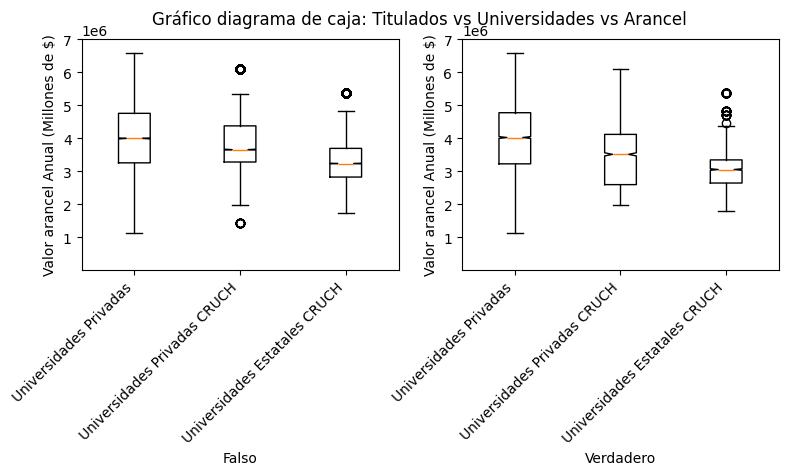

In [19]:
# Grafico diagrama de cajas
Universidad = ["Universidades Privadas", "Universidades Privadas CRUCH", "Universidades Estatales CRUCH"]

Variable_titulado = df['titulado']
Variable_tipo_instituto = df['tipo_inst_3']
Variable_arancel = df['valor_arancel']
Tipo_institulo_verdadero = []
Tipo_institulo_falso = []
Valor_arancel_verdadero = []
Valor_arancel_falso = []

for i in range(len(Variable_titulado)):
  if Variable_titulado[i] == True:
    Tipo_institulo_verdadero.append(Variable_tipo_instituto[i])
    Valor_arancel_verdadero.append(Variable_arancel[i])
  if Variable_titulado[i] == False:
    Tipo_institulo_falso.append(Variable_tipo_instituto[i])
    Valor_arancel_falso.append(Variable_arancel[i])

Valor_arancel_verdadero_universidades_privadas = []
Valor_arancel_verdadero_universidades_privadas_CRUCH = []
Valor_arancel_verdadero_universidades_estatales_CRUCH = []
for i in range(len(Tipo_institulo_verdadero)):
  if Tipo_institulo_verdadero[i] == "Universidades Privadas":
    Valor_arancel_verdadero_universidades_privadas.append(Valor_arancel_verdadero[i])
  if Tipo_institulo_verdadero[i] == "Universidades Privadas CRUCH":
    Valor_arancel_verdadero_universidades_privadas_CRUCH.append(Valor_arancel_verdadero[i])
  if Tipo_institulo_verdadero[i] == "Universidades Estatales CRUCH":
    Valor_arancel_verdadero_universidades_estatales_CRUCH.append(Valor_arancel_verdadero[i])

Valor_arancel_verdadero = [
    Valor_arancel_verdadero_universidades_privadas,
    Valor_arancel_verdadero_universidades_privadas_CRUCH,
    Valor_arancel_verdadero_universidades_estatales_CRUCH
]

Valor_arancel_falso_universidades_privadas = []
Valor_arancel_falso_universidades_privadas_CRUCH = []
Valor_arancel_falso_universidades_estatales_CRUCH = []
for i in range(len(Tipo_institulo_falso)):
  if Tipo_institulo_falso[i] == "Universidades Privadas":
    Valor_arancel_falso_universidades_privadas.append(Valor_arancel_falso[i])
  if Tipo_institulo_falso[i] == "Universidades Privadas CRUCH":
    Valor_arancel_falso_universidades_privadas_CRUCH.append(Valor_arancel_falso[i])
  if Tipo_institulo_falso[i] == "Universidades Estatales CRUCH":
    Valor_arancel_falso_universidades_estatales_CRUCH.append(Valor_arancel_falso[i])

Valor_arancel_falso = [
    Valor_arancel_falso_universidades_privadas,
    Valor_arancel_falso_universidades_privadas_CRUCH,
    Valor_arancel_falso_universidades_estatales_CRUCH
]

plt.figure(figsize=(9, 3))
plt.suptitle("Gráfico diagrama de caja: Titulados vs Universidades vs Arancel")
plt.axis('off')

plt.subplot(1, 2, 1)
colores = ["#20B2AA", "#87CEFA", "#FFA07A"] # verde, celeste, naranja
plt.boxplot(Valor_arancel_falso, Universidad, label='Falso')
plt.xticks([1,2,3], ["Universidades Privadas", "Universidades Privadas CRUCH", "Universidades Estatales CRUCH"], rotation=45, ha='right')
plt.ylabel("Valor arancel Anual (Millones de $)")
plt.ylim(1, 7000000)
plt.xlabel("Falso")

plt.subplot(1, 2, 2)
plt.boxplot(Valor_arancel_verdadero, Universidad, label='Verdadero')
plt.ylabel("Valor arancel Anual (Millones de $)")
plt.xticks([1,2,3], ["Universidades Privadas", "Universidades Privadas CRUCH", "Universidades Estatales CRUCH"], rotation=45, ha='right')
plt.ylim(1, 7000000)
plt.xlabel("Verdadero")

plt.show()


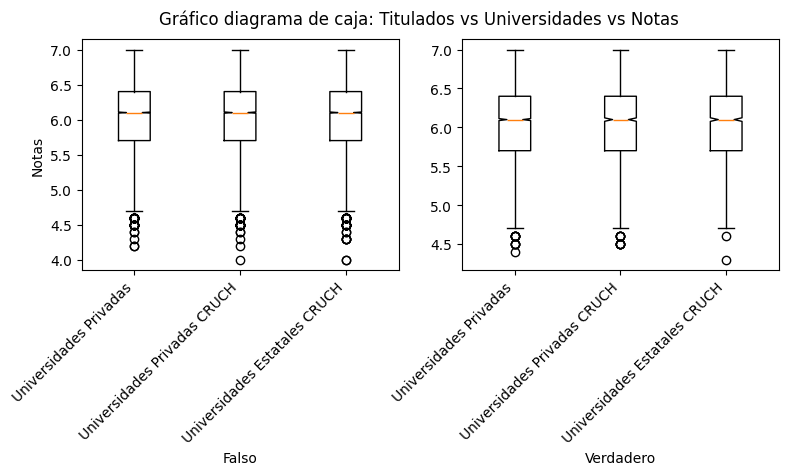

In [20]:
# Grafico diagrama de cajas
Universidad = ["Universidades Privadas", "Universidades Privadas CRUCH", "Universidades Estatales CRUCH"]

Variable_titulado = df['titulado']
Variable_tipo_instituto = df['tipo_inst_3']
Variable_notas = df['prom_notas_alu']
Tipo_instituto_verdadero = []
Tipo_instituto_falso = []
Notas_verdadero = []
Notas_falso = []

for i in range(len(Variable_titulado)):
  if Variable_titulado[i] == True:
    Tipo_instituto_verdadero.append(Variable_tipo_instituto[i])
    Notas_verdadero.append(Variable_arancel[i])
  if Variable_titulado[i] == False:
    Tipo_instituto_falso.append(Variable_tipo_instituto[i])
    Notas_falso.append(Variable_arancel[i])

Notas_verdadero_universidades_privadas = []
Notas_verdadero_universidades_privadas_CRUCH = []
Notas_verdadero_universidades_estatales_CRUCH = []
for i in range(len(Tipo_institulo_verdadero)):
  if Tipo_instituto_verdadero[i] == "Universidades Privadas":
    Notas_verdadero_universidades_privadas.append(float(Variable_notas[i].replace(',', '.')))
  if Tipo_instituto_verdadero[i] == "Universidades Privadas CRUCH":
    Notas_verdadero_universidades_privadas_CRUCH.append(float(Variable_notas[i].replace(',', '.')))
  if Tipo_instituto_verdadero[i] == "Universidades Estatales CRUCH":
    Notas_verdadero_universidades_estatales_CRUCH.append(float(Variable_notas[i].replace(',', '.')))


Notas_verdadero = [
    Notas_verdadero_universidades_privadas,
    Notas_verdadero_universidades_privadas_CRUCH,
    Notas_verdadero_universidades_estatales_CRUCH
]

Notas_falso_universidades_privadas = []
Notas_falso_universidades_privadas_CRUCH = []
Notas_falso_universidades_estatales_CRUCH = []
for i in range(len(Tipo_institulo_falso)):
  if Tipo_instituto_falso[i] == "Universidades Privadas":
    Notas_falso_universidades_privadas.append(float(Variable_notas[i].replace(',', '.')))
  if Tipo_instituto_falso[i] == "Universidades Privadas CRUCH":
    Notas_falso_universidades_privadas_CRUCH.append(float(Variable_notas[i].replace(',', '.')))
  if Tipo_instituto_falso[i] == "Universidades Estatales CRUCH":
    Notas_falso_universidades_estatales_CRUCH.append(float(Variable_notas[i].replace(',', '.')))

Notas_falso = [
    Notas_falso_universidades_privadas,
    Notas_falso_universidades_privadas_CRUCH,
    Notas_falso_universidades_estatales_CRUCH
]

plt.figure(figsize=(9, 3))
plt.suptitle("Gráfico diagrama de caja: Titulados vs Universidades vs Notas")
plt.axis('off')

plt.subplot(1, 2, 1)
colores = ["#20B2AA", "#87CEFA", "#FFA07A"] # verde, celeste, naranja
plt.boxplot(Notas_falso, Universidad, label='Falso')
plt.xticks([1,2,3], ["Universidades Privadas", "Universidades Privadas CRUCH", "Universidades Estatales CRUCH"], rotation=45, ha='right')
plt.ylabel("Notas")
#plt.ylim(1, 7000000)
plt.xlabel("Falso")

plt.subplot(1, 2, 2)
plt.boxplot(Notas_verdadero, Universidad, label='Verdadero')
plt.xticks([1,2,3], ["Universidades Privadas", "Universidades Privadas CRUCH", "Universidades Estatales CRUCH"], rotation=45, ha='right')
#plt.ylim(1, 7000000)
plt.xlabel("Verdadero")

plt.show()


En las universisades estalaes el costo es considerablemente bajo, en comparacion con las universidades privadas.</br>
En cambio con respecto a las notas, en los 2 grupos es similar.

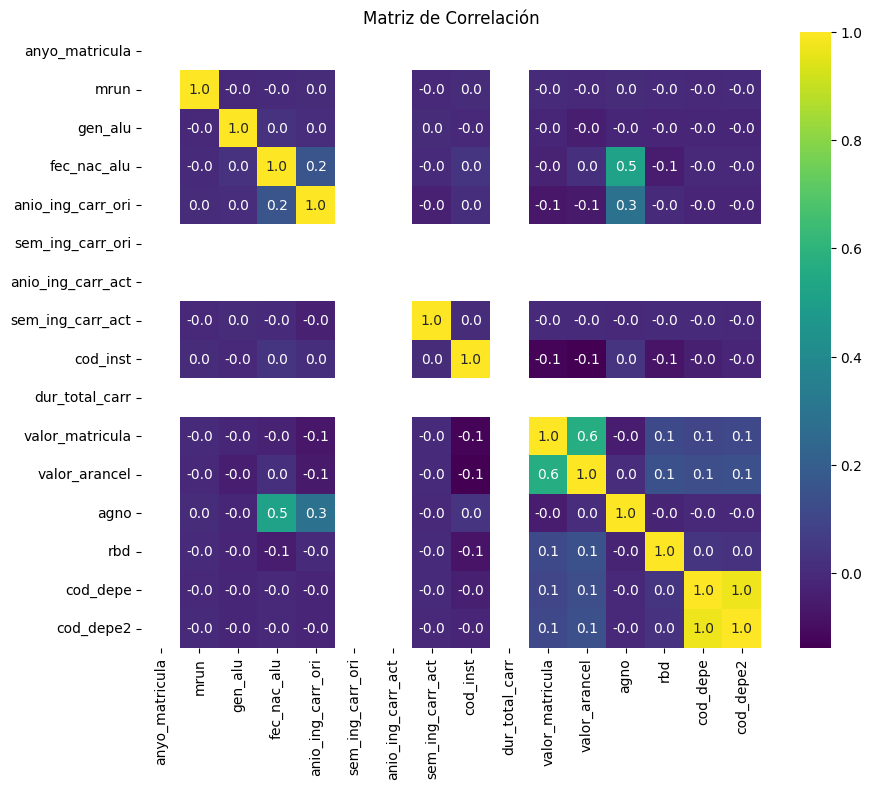

In [21]:
# Gráfico Matriz de Correlacion

df_num = df.select_dtypes(include="number")
corr = df_num.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".1f", cmap="viridis")
plt.title("Matriz de Correlación")
plt.show()


La correlacion entre las variables es bajisima.

## 8. Definición de variable objetivo

In [22]:
#Transforma valores categóricos de la columna 'Titulado' a valores binarios 1 y 0
df['titulado'] = df['titulado'].map({True: 1, False: 0})

In [23]:
# ver proporción de clases en la variable objetivo
print(df["titulado"].value_counts(normalize=True).rename("proporción"))


titulado
0    0.815171
1    0.184829
Name: proporción, dtype: float64


## 9. Selección de predictores

In [24]:
# Selección de variables predictoras y variable objetivo

numeric_features = [
    "anio_ing_carr_act",
    "valor_arancel",
    "valor_matricula"
]

categorical_features = [
    "gen_alu",
    "nomb_carrera",
    "tipo_inst_2",
    "region_sede"
]

X = df[numeric_features + categorical_features]
y = df["titulado"]



In [25]:
X = X.copy()

for col in numeric_features:
    X[col] = pd.to_numeric(X[col], errors="coerce")

In [26]:
X.isna().mean()

anio_ing_carr_act    0.0
valor_arancel        0.0
valor_matricula      0.0
gen_alu              0.0
nomb_carrera         0.0
tipo_inst_2          0.0
region_sede          0.0
dtype: float64

Se verificó que no existían valores faltantes en las variables utilizadas, por lo que no fue necesario aplicar ningún tratamiento adicional.

In [27]:
numeric_transformer_base = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_base = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_base, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [28]:
def evaluate_model_cv(model, X, y, cv_splits=5):
    """
    Ejecuta k-fold CV estratificada y:
    - Ajusta el modelo en cada fold
    - Acumula predicciones y probabilidades
    - Muestra matriz de confusión, reporte, ROC, PR
    """
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    y_true_all = []
    y_pred_all = []
    y_proba_all = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
        y_proba_all.extend(y_proba)

    y_true_all = np.array(y_true_all)
    y_pred_all = np.array(y_pred_all)
    y_proba_all = np.array(y_proba_all)

    # Matriz de confusión
    cm = confusion_matrix(y_true_all, y_pred_all)
    print("Matriz de confusión global (todos los folds):")
    print(cm)

    # Reporte de clasificación
    print("Reporte de clasificación:")
    print(classification_report(y_true_all, y_pred_all, digits=3))

    # ROC
    fpr, tpr, _ = roc_curve(y_true_all, y_proba_all)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title("Curva ROC (CV global)")
    plt.legend()
    plt.show()

    # Precision–Recall
    precision, recall, _ = precision_recall_curve(y_true_all, y_proba_all)
    pr_auc = average_precision_score(y_true_all, y_proba_all)

    plt.figure()
    plt.step(recall, precision, where="post", label=f"PR (AP = {pr_auc:.3f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Curva Precision–Recall (CV global)")
    plt.legend()
    plt.show()

    print(f"AUC-ROC global: {roc_auc:.3f}")
    print(f"PR-AUC (Average Precision) global: {pr_auc:.3f}")

    return {
        "cm": cm,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc
    }


In [29]:
X

,anio_ing_carr_act,valor_arancel,valor_matricula,gen_alu,nomb_carrera,tipo_inst_2,region_sede
0,2019,3570000,165000,1,TERAPIA OCUPACIONAL,Universidades CRUCH,Los Ríos
1,2019,2964000,296400,2,INGENIERIA COMERCIAL,Universidades Privadas,Metropolitana
2,2019,4385800,175000,2,ENFERMERIA,Universidades Privadas,Biobío
3,2019,2848200,120000,2,PEDAGOGIA EN EDUCACION FISICA,Universidades Privadas,Biobío
4,2019,4111800,139200,2,OBSTETRICIA Y PUERICULTURA,Universidades CRUCH,Metropolitana
...,...,...,...,...,...,...,...
65212,2019,3271500,130000,2,NUTRICION Y DIETETICA,Universidades Privadas,La Araucanía
65213,2019,3264000,250000,1,INGENIERIA COMERCIAL,Universidades Privadas,Valparaíso
65214,2019,2520000,151000,1,INGENIERIA CIVIL METALURGICA,Universidades CRUCH,Tarapacá
65215,2019,5050000,455000,2,INGENIERIA COMERCIAL,Universidades Privadas,Metropolitana


## 9. Modelos

### 9.1. Regresion Logística Base

Se utiliza un valor alto de C para minimizar la regularización y establecer un baseline comparable.

Matriz de confusión global (todos los folds):
[[51741  1422]
 [10328  1726]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.834     0.973     0.898     53163
           1      0.548     0.143     0.227     12054

    accuracy                          0.820     65217
   macro avg      0.691     0.558     0.563     65217
weighted avg      0.781     0.820     0.774     65217



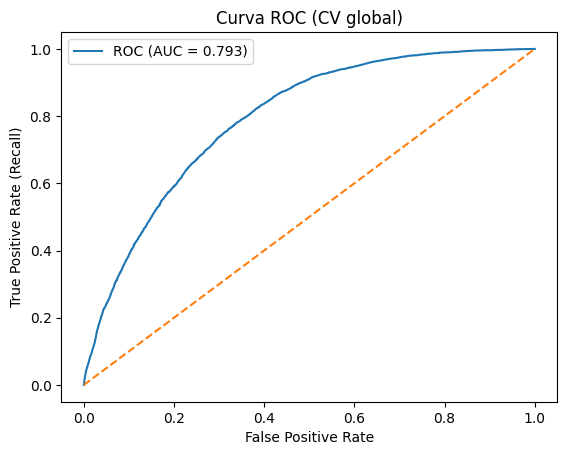

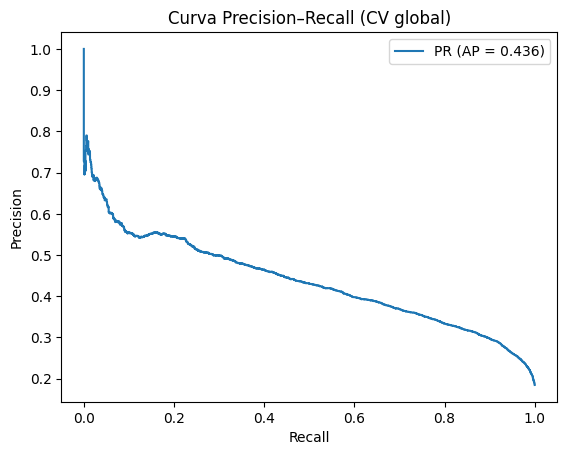

AUC-ROC global: 0.793
PR-AUC (Average Precision) global: 0.436


In [30]:
# Regresion logistica base

log_reg_base = Pipeline(steps=[
    ("preprocess", preprocessor_base),
    ("clf", LogisticRegression(
        #penalty="l2",   # C grande ≈ sin regularización fuerte
        C=1e6,
        solver="lbfgs",
        max_iter=1000
    ))
])


results_base = evaluate_model_cv(log_reg_base, X, y, cv_splits=5)

Matriz de confusión global (todos los folds):
[[36201 16962]
 [ 3374  8680]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.915     0.681     0.781     53163
           1      0.339     0.720     0.461     12054

    accuracy                          0.688     65217
   macro avg      0.627     0.701     0.621     65217
weighted avg      0.808     0.688     0.722     65217



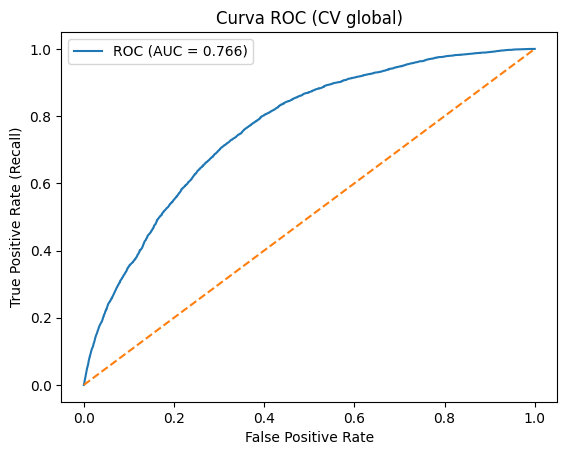

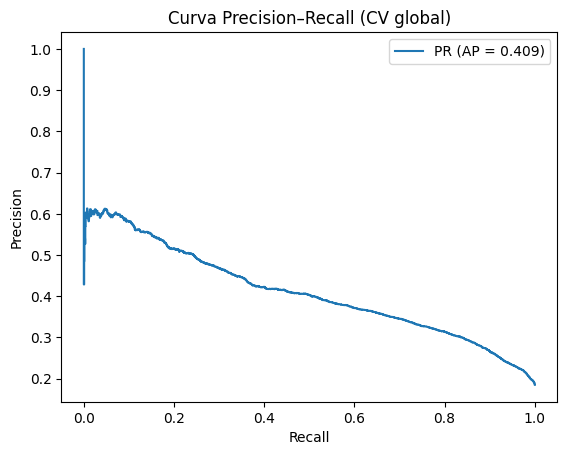

AUC-ROC global: 0.766
PR-AUC (Average Precision) global: 0.409


In [32]:
# Random Forest

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocessor_base),
    ("model", RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_leaf=30,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

results_rf = evaluate_model_cv(rf_pipe, X, y)

In [ ]:
results = []

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", model)
    ])

    metrics = evaluate_model(pipe, X, y)
    metrics["Modelo"] = name
    results.append(metrics)

results_df = pd.DataFrame(results)
results_df = results_df.set_index("Modelo").round(4)

results_df


In [ ]:
best_model_name = results_df["F1-score"].idxmax()
best_model = models[best_model_name]

final_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", best_model)
])

final_pipeline.fit(X, y)

joblib.dump(final_pipeline, "modelo_titulacion_2023.pkl")


## Discusión de Resultados

La Tabla comparativa muestra el desempeño de los cuatro clasificadores evaluados utilizando validación cruzada y múltiples métricas. Se observa que no existe un modelo que domine claramente en todas las métricas, lo que evidencia el compromiso entre precisión, sensibilidad y complejidad del modelo.

El modelo **K-Nearest Neighbors (KNN)** alcanza la mayor *accuracy* (0.82), sin embargo, presenta un *recall* considerablemente bajo (0.36). Esto indica que, si bien clasifica correctamente una alta proporción de observaciones en general, falla en identificar una fracción importante de la clase positiva, lo cual limita su utilidad en un contexto donde es relevante detectar correctamente los casos de interés.

Por otro lado, **Logistic Regression** y **Decision Tree** presentan los valores más altos de *recall* (0.78 y 0.75 respectivamente), lo que sugiere una mayor capacidad para identificar correctamente la clase positiva. No obstante, ambos modelos muestran bajos valores de *precision*, lo que implica una mayor tasa de falsos positivos.

El modelo **Random Forest** logra un equilibrio más estable entre *precision* y *recall*, alcanzando un *F1-score* competitivo (0.46), cercano al mejor valor obtenido (Logistic Regression con 0.48), pero con una estructura más robusta frente al sobreajuste gracias al uso de múltiples árboles y control de complejidad.

Considerando el compromiso entre rendimiento global, balance entre métricas y complejidad del modelo, **Random Forest** se selecciona como el modelo final, ya que ofrece un desempeño consistente y una mayor capacidad de generalización en comparación con los clasificadores individuales.


In [ ]:
model = joblib.load("modelo_titulacion_2023.pkl")

model